# Alessandro Pomponio - alessandro.pomponio2@studio.unibo.it

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Variables
file_name = 'mba.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)

0. read a market basket database from the csv file provided and
generate a dataframe basket of boolean values with one row
per transaction and one column per distinct item of the
database; the dataframe values must be True if a distinct item
is contained in the transaction
• the file contains one transaction per line, the first
element is the number of items in the transaction,
followed by the items of the transaction, and then a
variable number of empty fields
• the field names in the first row of the csv file are not
relevant
1. ignore the transactions containing a single item (2 points)
2. the column names of the output dataframe are the distinct items
(2 points)
3. show the first five rows of the output dataframe (1 point)
4. show the number of transactions and of distinct items
(1 point)
5. find a value of min_support such that the apriori algorithm
generates at least 8 frequent itemsets with at least 2 items
 (5 points)
• output the result with the message below
• min_support: 0.xxxx - number of itemsets with at least 2
items: nn)
6. find the minimum metric threshold such that at least 10
association rules are extracted from the frequent itemsets found
(5 points)
• use "confidence" as metric and output the line below:
• Metric: "confidence" - min_metric: 0.xxxx - Number of
rules: n
7. print the first 10 rules found, sorted by descending confidence
and support (3 points)
8. plot confidence and support for all the sorted rules found
(3 points)
9. scatter plot the rules by confidence and support, labelling the
points with the index value of the corresponding rule
(hint https://stackoverflow.com/questions/14432557/matplotlibscatter-plot-with-different-text-at-each-data-point) (3 points)

## 0. read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction

• _the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields_

• _the field names in the first row of the csv file are not relevant_

In [2]:
# Open the file
file = open(file_name, mode = 'r')

# The transactions are separated by a ','
# We must also strip the '\n' at the end of the transaction
transactions = [line.strip('\n').split(separator) for line in file.readlines()]

# The first line contains field names that are not relevant, so let's skip it
transactions = transactions[1:]

# The first item in every transaction is a number of the items in the transaction
# we want to use it to slice the list, removing all the empty strings and the 
# number itself
for i in range(len(transactions)):

        # The end index is the number of items in the transaction
        # plus one, because we have the number itself in the slot 0
        end_index = int(transactions[i][0]) + 1
        transactions[i] = transactions[i][1:end_index]

# We now have a list of transactions with only the items in them, we can now
# use TransactionEncoder to obtain an encoded version in boolean form
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(transactions)

# We can now put the encoded transactions in a dataframe
basket = pd.DataFrame(encoded_transactions)

In [10]:
transactions

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

## 1. ignore the transactions containing a single item (2 points)

In [3]:
single_item_transactions = []

# Iterate on all transactions
for index, transaction in basket.iterrows():

    # If there is just one "True" value
    if np.count_nonzero(transaction) == 1:

        # Save the index of the transaction
        single_item_transactions.append(index)

# We can now drop those transactions from the dataframe
basket.drop(index = single_item_transactions, axis = 0, inplace = True)

## 2. the column names of the output dataframe are the distinct items (2 points)

In [4]:
basket.columns = encoder.columns_

## 3. show the first five rows of the output dataframe (1 point)

In [5]:
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


## 4. show the number of transactions and of distinct items (1 point)

In [6]:
print(f"There are {basket.shape[0]} transactions and {basket.shape[1]} distinct items")

There are 7676 transactions and 169 distinct items


## 5. find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items  (5 points)

• _output the result with the message below_

• _min_support: 0.xxxx - number of itemsets with at least 2 items: nn)_

In [7]:
# Requirements
min_itemsets = 8
min_items_in_itemset = 2

# "Reasonable" range
support_range = np.arange(0.1, 0.01, -0.01)

In [8]:
min_support = 0

for s_value in support_range:

    frequent_itemsets = apriori(basket, min_support = s_value, use_colnames = True)

    # Calculate the number of itemsets that contain at least `min_item_in_itemset` items
    itemsets_above_threshold = sum([len(itemset) >= min_items_in_itemset for itemset in frequent_itemsets.itemsets])
    
    if itemsets_above_threshold >= min_itemsets:
        min_support = s_value
        break

print(f"min_support: {min_support:.4f} - number of itemsets with at least 2 items: {itemsets_above_threshold}")

min_support: 0.0500 - number of itemsets with at least 2 items: 9


## 6. find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found (5 points) 

• _use "confidence" as metric and output the line below:_

• _Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n_

In [9]:
# Threshold
min_rules = 10

# "Reasonable" range
confidence_range = np.arange(1, 0.01, -0.01)

In [10]:
min_confidence = 0

for c_value in confidence_range:

    rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = c_value)
  
    if len(rules) >= min_rules:
        min_confidence = c_value
        break

print(f'Metric: "confidence" - min_metric: {min_confidence:.4f} - Number of rules: {len(rules)}')

Metric: "confidence" - min_metric: 0.2500 - Number of rules: 10


## 7. print the first 10 rules found, sorted by descending confidence and support (3 points)

In [11]:
sorted_rules = rules.sort_values(by = ['confidence', 'support'], ascending = False).reset_index(drop=True)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380
1,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861
2,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035
3,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290
4,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836
6,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823
7,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011
8,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283
9,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187


## 8. plot confidence and support for all the sorted rules found (3 points)

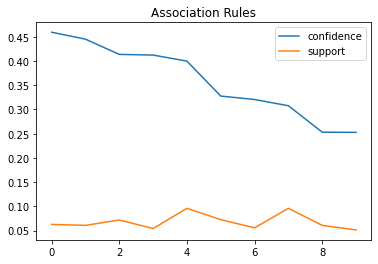

In [12]:
sorted_rules[['confidence','support']].plot(title='Association Rules');

## 9. scatter plot the rules by confidence and support, labelling the points with the index value of the corresponding rule

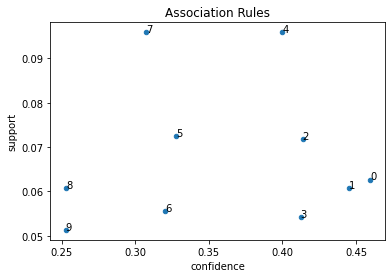

In [13]:
# Create a scatter plot of the sorted rules
fig = sorted_rules.plot.scatter(x = 'confidence', y = 'support', title = 'Association Rules');

# Iterate over all the rules and annotate them with their index
for i in range(len(sorted_rules)):
    fig.annotate(text = i, xy = (sorted_rules['confidence'][i], sorted_rules['support'][i]))